# 군집화:Clustering

- 목적
    - 머신러닝 > 비지도학습 > 군집
    - 데이터가 주어졌다. -> 분류를 할 수 있는 정답(레이블)이 없다. 이 데이터는 뭐지?, 무엇을 표방하는지 잘 모르겠다.
    - 주어진 데이터들을 몇 개의 클러스터(군집)으로 나누는 과정
- 목표
    - 데이터에 정답이 없어서 특징, 거리 등등 기준을 통해서 데이터를 분류하여 그렇게 나눠진 데이터들을 하나의 특징(레이블)으로 보고 이후 분류나 기타 알고리즘을 적용하여 예측/분석을 수행 할 수 있는 과정에 큰 역할을 담당한다.
    - 분류나 회귀로 가기 위해 데이터를 전처리하는 과정으로 이해해도 괜찮다.

## K-Mean

- 가장 일반적인 방법
- **거리 기반**
- 원리
    - 군집의 중심점이라는 특정한 임의의 지점을 선택하여, 해당 **중심점**에 가까운 포인트(데이터)들을 선택하는 기법

In [1]:
from IPython.display import Image

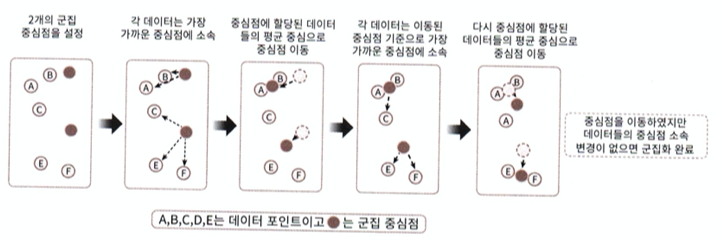

In [2]:
Image('./res/머신러닝_알고리즘_참고쟈료/k-mean_0.png')

1. 최초 구성시 군집점의 갯수를 지정한다(개발자) -> 모르겠으면 여러개의 후보군 놓고 비교평가 해서 선정
2. 중심점 생성
    - 랜덤하게 구성한다면, 운이 나쁘면 아주 오래 걸릴것이다!
    - 실제적으로는 밀도가 높은 쪽 혹은 평균적인 위치 등을 고려하여 최초 중심점을 선정할 것이다.
3. 해당 중심점에 가까운 데이터 포인트들이 군집하게 된다. (중심점에 소속화 된다.)
4. 이렇게 군집이 형성되면, 중심점은 해당 포인트가 속한 군집의 모든 데이터의 평균 지점에 이동하게 된다.
5. 반복(3~4) - 군집의 범위가 커진다. (변경된다)
6. 언젠가 더이상 중심점이 바뀌지 않게 된다면, 군집 종료가 된다.

- 강점 
    - 가장 많이 활용된다. (쉽고, 직관적)
    - 알고리즘도 심플
- 단점 
    - 데이터가 많으면, 군집의 정확도(평가 등을 통해서 확인)가 떨어질 수 있다.
        - 차원축소(데이터 압축 -> PCA ...)
    - 반복횟수(3~4단계)가 많으면, 군집시간이 오래 걸린다.
    - 몇개로 군집하는 것이 적절한지? 정하기가 어렵다. (평가도구, 여러개의 후보군을 둬서 진행)

In [4]:
from sklearn.preprocessing import StandardScaler, scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# 데이터 준비
iris = load_iris()
iris.feature_names
# 아이리스 데이터를 받았는데, 이 데이터를 기준으로 몇 개의 종으로 군집해야할지 혹은 몇 개의 종이 있는지 조차도
# 모른다.(현재상황)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
# 알고리즘 생성 
"""
- n_clusters : 군집의 갯수, 군집 중심점의 갯수, 기본값 : 8
- init       : {'k-means++','random'}, 군집 중심점을 잡는 방법, 최초 설정 방법
    - k-means++ : 최초 중심점을 잡는 방법이 업그레이드 되었다. 
        - 1. 데이터 포인트 중에 무작위로 1개를 선택
        - 2. 그 1개를 중심점으로 선정
        - 3. 나머지 데이터들을 그 포인트(중심점)에 대해서 거리 계산
        - 4. 두번째 중심점들은 각 데이터로부터 거리 비례 확률에 따라 선택 -> 임의 지정된 중심점으로 부터 최대한
        먼 곳에 배치된 데이터 포인트들을 그 다음의 중심점으로 지정
        - 5. 이 과정을 최초 세팅한 중심점의 갯수가 완성 될 때 까지 반복한다.
        - 모든 중심점들이 서로서로 가장 멀리 있게 된다. (다음 중심점 계산 시 이전 중심점은 배제)
        - 초기 중심점 위치의 속업?
- max_iter : 최대 반복 횟수, 군집 중심점이 이동 할 수 있는 최대 횟수, 이 횟수에 도달하면, 더 이상 이동이 없다.
            이동이 없으면 군집 종료(그전에라도 이동이 없으면 종료)
"""

# n_clusters를 3으로 준것은 임의로 설정
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans

KMeans(n_clusters=3, random_state=0)

In [11]:
# 훈련
kmeans.fit(iris_df)

KMeans(n_clusters=3, random_state=0)

In [12]:
# 각 데이터 포인트가 어떤 그룹에 속했는지 확인 -> 라벨링
kmeans.labels_, kmeans.labels_.shape

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
        0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
        0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2]),
 (150,))

In [13]:
# 훈련한 데이터 넣어서 예측을 그냥 해보았는데, 라벨링 값과 동일함을 알 수 있다. 
kmeans.predict(iris_df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [14]:
# 군집의 중심점 좌표를 확인
# 중심점은 최초 설계한 대로 3개가 나왔고, 그 위치는 4개의 피쳐로 설명된다.
kmeans.cluster_centers_ , kmeans.cluster_centers_.shape

(array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
        [5.006     , 3.428     , 1.462     , 0.246     ],
        [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]]),
 (3, 4))

In [15]:
# 그럼 군집이 잘 되었는가? -> 이미 데이터가 답을 가지고 있으므로, 정답과 비교를 해볼 수 있다.
# 파생변수를 iris_df에 target 컬럼(정답), cluster 컬럼(군집결과) 추가한다.
iris_df['target'] = iris.target
iris_df['cluster'] = kmeans.labels_
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


In [16]:
iris_df['target'].unique(), iris_df['cluster'].unique()
# 값의 종류가 다르니까 동일 성분인지만 신경 쓰면 된다. 

(array([0, 1, 2]), array([1, 2, 0]))

In [17]:
# 실제 분류값과 군집값 사이의 카운트를 표현하시오
# 타겟이 0 일때, 군집 1 이 50개이다
# 특정 컬럼 대비해서 특정 컬럼의 값(성분, 특정 컬럼)의 갯수를 보고 싶다.
iris_df.groupby(['target','cluster'])[iris_df.columns[0]].count()

# 0번 품종은 잘 나누어져 있다 (다른 성분값이 없다)
# 1,2번 품종은 데이터들이 겹쳐있다. 겹쳐진 양이 다르다... 완벽한 그룹화가 되지는 않는다.
# 그렇다면 차원 축소 기법을 써서 특성을 줄여(압축해서)서 다시 군집을 시도하여 비교해 보겠다

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal length (cm), dtype: int64

In [18]:
iris_df.groupby(['target']).sum() # 진짜 숫자의 합

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
target,,,,,
0,250.3,171.4,73.1,12.3,50
1,296.8,138.5,213.0,66.3,96
2,329.4,148.7,277.6,101.3,28


### 차원축소 이용(PCA)

- 도입이유
    - 실제 정답과 비교해보니, 겹치는 부분이 존재해서 (타겟 1,2번) 이를 보정하기 위해서, 특성을 줄이겠다.
    - 단, 이것이 완벽한 군집을 보장하지는 않는다.
    - 차원축소를 활용하여 데이터의 품질을 조정하고 다시 시도하라는 의미

In [19]:
# 전체 PCA가 대표적인 기법인데, 그 의미는 접어두고 진행
from sklearn.decomposition import PCA

In [20]:
# n_components : 몇개의 특성으로 압축할 것인가
# 아래의 표현은 2개의특성으로 나오게끔, 4개의 특성을 압축할 것이다.
pca =PCA(n_components=2)
iris_pca = pca.fit_transform(iris.data)
iris_pca.shape

(150, 2)

In [21]:
iris_pca[:2]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123]])

In [22]:
# df에 추가를 할 것인데, pca_1, pca_2 로 파생변수를 추가하겠다.
iris_df['pca_1'] = iris_pca[:,0]
iris_df['pca_2'] = iris_pca[:,1]
iris_df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster,pca_1,pca_2
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001


In [23]:
# 예를 들어 군집값이 0인 데이터들 중에서 pca_1의 갯수 
iris_df[iris_df['cluster']== 0]['pca_1'].shape

(38,)

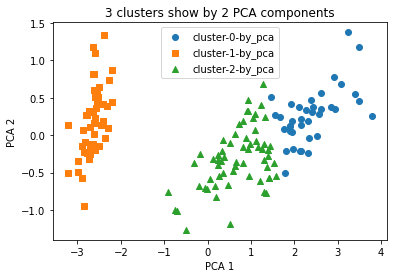

In [24]:
# 산포도를 이용하여 분포를 그리겠다.
# 같은 그룹에 있는 데이터 포인트들을 그리면 군집별로 색상이 구분된다. 
# 총 그려야할 대상은 3개의 군집으로 나눴기 때문에 3회 반복 (군집중심점의 갯수와 동일)
markers = ['o','s','^'] # 동그라미, 네모, 삼각형

# Plotting
for idx, marker in enumerate(markers) :
    # 특정 클러스터 (0,1,2)인 데이터만 모아서
    tmp = iris_df[iris_df['cluster']==idx]
    # pca_1 만 획득 -> 인덱싱, df상에서 차원축소 Series가 된다.
    x = tmp['pca_1']
    # pca_2 만 획득
    y = tmp['pca_2']
    # 산포도를 3번 그린다.
    plt.scatter(x,y,marker=marker, label = f'cluster-{idx}-by_pca')
    pass
# 차트외곽 조정
# 범례, 축 이름, 차트제목, 
plt.legend()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 clusters show by 2 PCA components')

# 쇼
plt.show()

# PCA를 반영한 2개의 피쳐 입장에서 군집을 바라보면 잘 분류되어 있다. 
# 그러나, 군집 훈련을 수행시 사용한 데이터는 iris.data를 가지고 수행했다.(4D)
# 따라서, 결과적으로는 우연하게 좋은것이지, PCA가 영향을 미친것은 아니다.
# 절차 -> iris.data 4D -> PCA -> 2D -> clustering (3개) -> 평가가 진짜이다.

In [25]:
# iris.data 4D -> PCA -> 2D -> clustering (3개) -> 진행
kmeans2 = KMeans(n_clusters=3, init='k-means++',max_iter=300, random_state=0)

In [26]:
# pca_1, pca_2 만 가진 데이터로 df 구성
iris_df2 = iris_df[['pca_1','pca_2']]
iris_df2
# 또는 
# iris_df2 = iris_df.iloc[:, -2: ]

,pca_1,pca_2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


In [27]:
kmeans2.fit(iris_df2)

KMeans(n_clusters=3, random_state=0)

In [28]:
iris_df2['target'] = iris.target
iris_df2['cluster'] = kmeans2.labels_
iris_df2.head(2)

<ipython-input-28-3efd7388e987>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_df2['target'] = iris.target
<ipython-input-28-3efd7388e987>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_df2['cluster'] = kmeans2.labels_


,pca_1,pca_2,target,cluster
0,-2.684126,0.319397,0,0
1,-2.714142,-0.177001,0,0


In [29]:
iris_df2.groupby(['target','cluster'])['pca_1'].count()
# pca를 사용해서 피처를 줄이고, 이를 이용하여 군집을 수행하였다.
# 원 데이터 (4피쳐)로 군집을 수행한것과 비교해보면 반드시 성능이 나아진다고 볼 수 없다.

target  cluster
0       0          50
1       1          47
        2           3
2       1          14
        2          36
Name: pca_1, dtype: int64

## 군집평가

- 군집을 수행하는 대부분의 데이터들은 정답이 없다.
    - 그래서 군집을 수행하는데 이것이 잘 된것인지 비교할 수가 없다.(정답이 없으니까)
    - 군집 평가 방법이 필요
        - 몇개로 군집을 수행해야 잘 분류가 되는가?
        - 지표 : 실루엣계수, 분석(시각화, 수치화)

### 실루엣 분석

- 각 군집간의 거리가 얼마나 효율적인가? 이것을 표현한다.
    - 평가기준 : 다른 군집과의 거리는 잘 떨어져있고, 군집의 포인트들이 잘 뭉쳐져 있다. (모여있다.)
    - 군집이 잘 되어있다면, 비슷한 수준의 여유공간이 군집 내에 형성되어 있다.
- 방법 
    - 실루엣계수
        - 개별 데이터들이 가지고 있는 군집화 지표

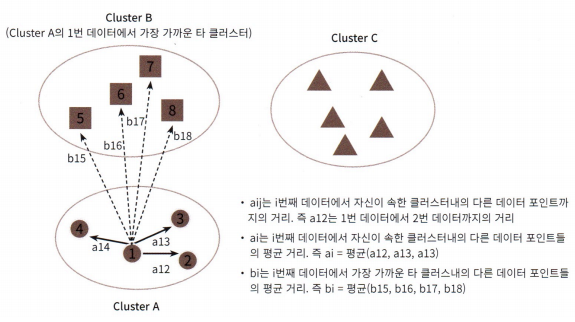

In [30]:
Image('./res/머신러닝_알고리즘_참고쟈료/cluster_실루엣_1.png')
# ai는 동일 클러스터 기준, 클러스터 내 특정 포인트가 다른 포인트와의 거리를 모두 합산해서 평균낸 것
# 포인트별로 각각 존재
# bi는 한 개의 클러스터 내의 한 포인트 기준으로 다른 클러스터들에 존재하는 모든 포인트들 까지의 거리를 합산, 평균한것
# bi(1 or 2 or 3 or 4,....)

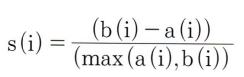

In [31]:
'''
i : 특정 데이터 포인트
s(i) : 특정 데이터 포인트 i에 대한 실루엣 계수

a(i) : 같은 군집 내에서 i번 데이터 포인트에서 나머지 모든 데이터포인트 간의 거리를 평균
b(i) : 같은 군집 내에서 i번 데이터 포인트에서 다른 군집내의 모든 데이터포인트 간의 거리를 평균
b(i)-a(i) : i 포인트 기준 두 군집사이의 거리
b(i)-a(i)/(max(a(i),b(i))) : 정규화, 거리의 최댓값으로 나누었다.

해석 : -1 ~ 1 로 계수값이 나온다. (일반적으로 0~1사이로 두고 해석)
      - 1에 가까울수록 두개의 군집은 멀리 떨어져 있다. -> 군집화가 잘됏다.
      - 0에 가까울수록 두 군집은 가까워 진다. 
      - -1에 가까워지면, 두 군집은 겹쳐졌다. -> 다시 작업하시오!!
'''

Image('./res/머신러닝_알고리즘_참고쟈료/cluster_실루엣_2.png')

### 실루엣계수를 이용한 평가

- 0 ~ 1 사이로 판단, 1에 가까울수록 군집이 잘 되었다.
- 군집이 잘되었다고 판단하는 기준
    - 전체 실루엣 계수 평균과 개별 군집의 평균값의 차이(편차)가 적으면 좋다고 판단

In [32]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [33]:
iris_df = iris_df.iloc[:,:4]
iris_df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [34]:
# kmeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(iris_df)

KMeans(n_clusters=3, random_state=0)

In [35]:
iris_df['cluster'] = kmeans.labels_
iris_df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1


In [36]:
# 실루엣 계수 계산
# 각각의 데이터 포인트에 실루엣 계수 계산
score_samples = silhouette_samples(iris.data, iris_df['cluster'])
score_samples.shape

(150,)

In [38]:
score_samples[:10],score_samples[-10:]

(array([0.85295506, 0.81549476, 0.8293151 , 0.80501395, 0.8493016 ,
        0.74828037, 0.82165093, 0.85390505, 0.75215011, 0.825294  ]),
 array([0.5702338 , 0.41025549, 0.23225278, 0.61324746, 0.5670778 ,
        0.42513648, 0.10417086, 0.31493016, 0.35245379, 0.18544229]))

In [39]:
# 모든 데이터 들의 평균 실루엣 계수 값
avg_score = silhouette_score(iris.data, iris_df['cluster'])
avg_score
# 1에 가까우면 군집을 잘했다.
# 0에 가까우면 다시 진행, 0.55는 중간 정도 레벨 -> 1에 최대한 가깝게 군집을 수행하시오(목표)

0.5528190123564091

In [40]:
# 파생변수 추가, 실루엣 점수
iris_df['silhouette_samples'] = score_samples
iris_df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,silhouette_samples
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495


In [41]:
# 군집별 실루엣 계수 평균을 출력하시오
iris_df.groupby('cluster')['silhouette_samples'].mean()
# 1번 군집을 잘 분류가 되었고, 나머지 그룹은 좀 더 조정이 필요해 보인다.

cluster
0    0.451105
1    0.798140
2    0.417320
Name: silhouette_samples, dtype: float64

### 실루엣 계수를 적용한 군집 평가 시각화

- 군집의 갯수를 2,3,4,5 등 여러개를 넣어서 평가
- 데이터는 군집용 더미 데이터를 활용(make_xxx)

In [42]:
import matplotlib.cm as cm

In [44]:
def show_silhouette_per_cluster(candi_clusters, features) :
    """
    Parameter
    - candi_cluster : 군집 후보군 (최적의 군집갯수를 비교검증해서 최적을 시각적으로 도출한다.)
    - features : 데이터 (군집의 대상이 되는 데이터)
    """
    # 표의 형태 준비
    ncols = len(candi_clusters)
    _,axes = plt.subplots(nrows=1, ncols=ncols, figsize=(ncols*5, 5))
    # 가로1줄, 세로4줄
    
    # 반복적으로 작업 진행 -> candi_clusters
    for idx, size in enumerate(candi_clusters) :
        # 군집 갯수별로 매번 반복 작업 수행 -> 그리기
        # 알고리즘 생성
        cluster_model = KMeans(n_clusters=size, init='k-means++', max_iter=500, random_state=0)
        # 학습 및 예측 수행
        cluster_label = cluster_model.fit_predict( features )
        # 실루엣 점수 개별 포인트들이 계산
        sil_values = silhouette_samples(features, cluster_label)
        # 평균 점수 획득
        sil_avg = silhouette_score(features, cluster_label)
        
        # 개별 그리기 -> 데이터에서 군집별로 획득 그린다. fill_betweenx
        # range(2) -> 0, 1
        y_st_lower = 10
        for i in range(size) :
            # 군집 획득 : 군집 번호와 일치하는 데이터들의 인덱스를 (참, 거짓으로 획득)
            # sil_values -> ndarray
            tmp = sil_values[cluster_label == i]
            # 데이터 정렬 -> 실루엣 계수값 기준, 분포 모양을 깔끔하게 잡기 위해서
            tmp.sort()
            # 그리기를 위한 데이터 준비
            # 군집으로 뭉친 데이터 갯수 => 수평선을 그릴 데이터 갯수 => y에 해당(범위의 끝값)
            # ex) 40 이라면, 0 ~ 40
            # ex) tmp.shape => (50,) 
            y = np.arange(y_st_lower, y_st_lower+tmp.shape[0])
            x1 = 0 # 데이터 포인트 한개를 수평선에 그린다. (x1,y), (x2,y)
            x2 = tmp # 실루엣 계수값
            color = cm.nipy_spectral(i/size) # 칼라선정
            # 그리기 : fill_betweenx
            axes[idx].fill_betweenx(y, x1, x2, edgecolor =color, facecolor = color)
            
            # 군집 번호 드로잉
            axes[idx].text(-0.03, y_st_lower + tmp.shape[0]/2, str(i))
            # 기준 y축 시작위치 조정 (다음 군집은 그 위로 그려야 하니까)
            # 새롭게 그려질 군집의 시작 y위치 = 최초 위치 + 이번에 그린 군집의 총갯수 + 10칸
            y_st_lower = y_st_lower + tmp.shape[0] + 10 
            pass
        
        
        # 플롯팅(외부적 정보)
        axes[ idx ].set_title(f'cluster counts {size}, sil_avg={round(sil_avg,3)}')
        axes[ idx ].set_xlabel( 'silhoette score' )
        axes[ idx ].set_ylabel( 'cluster label' )
        axes[ idx ].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        axes[ idx ].set_yticks([])
        
        # 그리기~ 
        # 각 군집별 실루엣 평균값을 그린다. (수직선, 점선, 빨강색)
        # 군집이 잘됏다면 실루엣 평균값 앞쪽으로 군집의 도형(모양)이 뺃어 나와야한다. 
        axes[ idx ].axvline(x=sil_avg, color='red',linestyle='--')

In [45]:
# 군집용 더미데이터를 만들어서 사용
from sklearn.datasets import make_blobs

In [46]:
# 더미 데이터 생성 
'''
- n_samples : 생성할 데이터의 갯수
- n_features : 특성 수
- centers : 군집 중심점의 수 -> 군집의 갯수, 개수, 좌표로도 줄수잇음(가능)
- cluster_std : 생성된 군집의 표준편차, 1개를 지정, 군집별로 지정할 수도 있다. #중심점에서 퍼진정도
'''
X,y = make_blobs( n_samples=500, n_features=2, centers=4, cluster_std=1.0, random_state=1 )

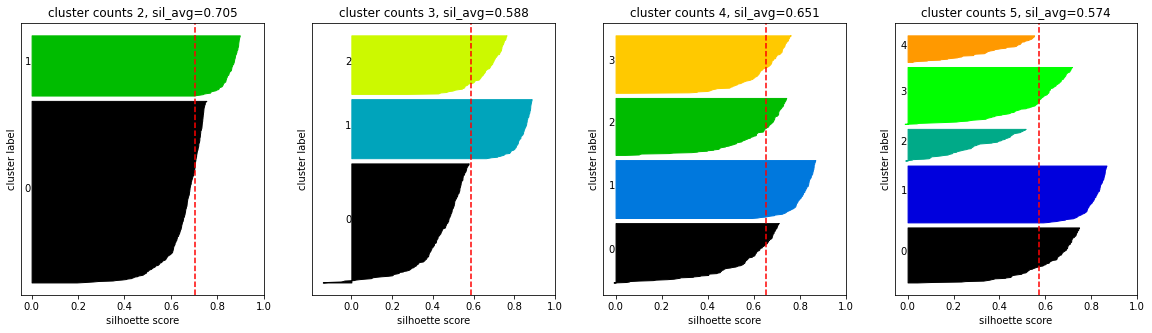

In [51]:
# 군집 후보들
candidate_clusters = [2,3,4,5]
# 시각화
show_silhouette_per_cluster(candidate_clusters, X)

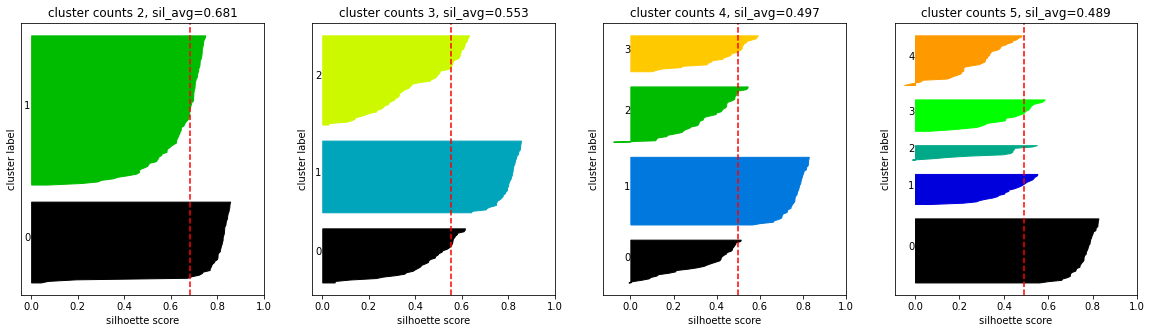

In [54]:
# 군집 후보들
candidate_clusters = [2,3,4,5]
# 시각화
show_silhouette_per_cluster( candidate_clusters, load_iris().data )
# 아이리스 경우 2~4개 까지 군집이 모두 가능하다
# 단, 3,4개 짜리 군집은 군집간 편차가 부분이 크다.
# 0.5 이상이면서 라는 조건이면 2,3개 군집이 적절

## Mean-Shift

- **밀도 기반 알고리즘**
- 특정한 **대역폭(bandwidth)**을 가지고, 최초의 확률 밀도 중심에서 밀도가 높은 쪽으로 중심 이동을 하는 방식 

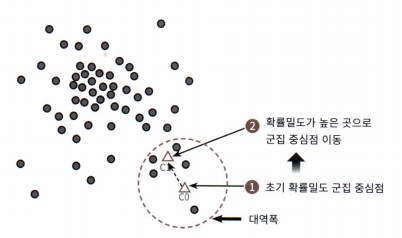

In [55]:
Image('./res/머신러닝_알고리즘_참고쟈료/cluster_meanshfit_1.png')
# 1. 데이터의 분포도를 이용하여 군집 중심점을 잡는다. 
# 2. 확률 밀도 함수 (KDE : Kernel density Estimation)을 이용
# 3. 가장 데이터가 밀집되어 있는 곳을 군집 중심점으로 조정한다.
# 4. 대역폭은 : 밀도 게산에 사용되는 경계선(원형)

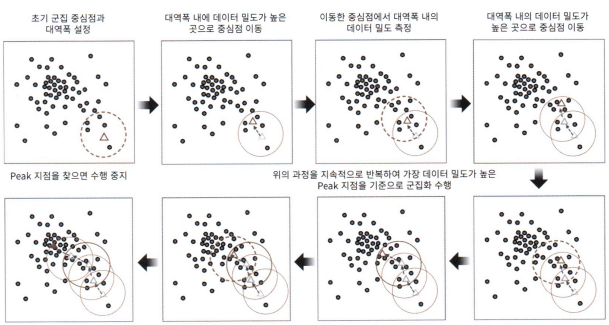

In [56]:
Image('./res/머신러닝_알고리즘_참고쟈료/cluster_meanshfit_2.png')
# 반복수행 -> 데이터의 밀도가 가장 높은 곳에 도달할때까지 (중심점이 도착)
# 품질 : 반복횟수, 대역폭의 크기 
# 장점 : 군집을 몇개로 할것인가? 정할 필요없다. -> 대역폭이 이 부분을 결정하게 될 것이다. 

In [57]:
# 더미데이터 활용
X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
X.shape, y.shape

((200, 2), (200,))

In [58]:
from sklearn.cluster import MeanShift

In [59]:
# 알고리즘 생성
meanshift = MeanShift(bandwidth=0.9)

In [60]:
# 훈련, 예측
cluster_labels = meanshift.fit_predict(X)
cluster_labels, np.unique(cluster_labels)
# 군집은 총 8개로 구성되었다.

(array([5, 0, 0, 1, 4, 1, 2, 6, 0, 1, 0, 1, 0, 0, 0, 1, 2, 2, 6, 3, 1, 2,
        0, 0, 3, 5, 7, 1, 5, 1, 6, 4, 1, 0, 2, 2, 0, 2, 7, 3, 2, 1, 3, 5,
        4, 4, 0, 1, 0, 0, 0, 2, 1, 5, 5, 1, 2, 2, 0, 4, 1, 5, 0, 2, 2, 1,
        2, 6, 1, 6, 7, 0, 0, 1, 5, 1, 2, 2, 2, 3, 1, 0, 0, 2, 2, 0, 0, 1,
        0, 2, 3, 1, 7, 0, 2, 0, 0, 1, 1, 2, 2, 4, 1, 0, 5, 5, 2, 0, 5, 6,
        0, 1, 2, 5, 0, 0, 6, 2, 1, 1, 2, 2, 1, 0, 2, 0, 3, 2, 1, 4, 1, 6,
        2, 2, 0, 2, 2, 0, 2, 1, 5, 1, 4, 2, 2, 0, 3, 3, 2, 0, 2, 3, 5, 1,
        0, 2, 2, 2, 0, 0, 6, 1, 1, 1, 0, 5, 2, 1, 2, 2, 6, 7, 5, 2, 1, 1,
        6, 3, 0, 6, 0, 1, 2, 2, 7, 6, 1, 2, 4, 4, 1, 1, 6, 2, 6, 2, 5, 2,
        0, 2], dtype=int64),
 array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64))

In [61]:
# bandwidth를 증가시킨다면..?
meanshift = MeanShift(bandwidth=(0.9+0.1))
cluster_labels = meanshift.fit_predict(X)
cluster_labels, np.unique(cluster_labels)
# 대역폭을 미세하게 조정하였는데, 군집의 수가 1/3 수준으로 줄어들었다.
# 최적화의 포인트는 대역폭 조정이다.

(array([1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 2,
        0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1,
        0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 2, 2, 1,
        2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 0, 1,
        0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 0, 0, 2,
        0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2,
        2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 1, 1,
        0, 2, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 2, 0, 2, 1, 1,
        0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2,
        0, 2], dtype=int64),
 array([0, 1, 2], dtype=int64))

In [62]:
# 최적의 bandwidth를 찾는 방법
from sklearn.cluster import estimate_bandwidth

In [63]:
'''
- quantile : 전체 데이터가 100개이다. 0.3이면 30건에 대해서 특정 알고리즘을 이용하여 클러스터링을 수행한다.
            특정 알고리즘-KNN(최근접이웃) : K-nearest Neighbor 이것을 통해서 최적의 bandwidth를 찾는다. 
- 전체데이터의 특정 비율을 이용하여 KNN을 작동 -> 최적 대역폭을 찾는 함수 
'''
best_bandwidth = estimate_bandwidth(X, quantile=0.2)
best_bandwidth

1.443521103865421

In [64]:
# quantile 값의 비율을 조정해 가면서 최적 영역을 점검해 갈 수 있다.
best_bandwidth = estimate_bandwidth(X, quantile=0.25)
Meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = Meanshift.fit_predict(X)
best_bandwidth, np.unique(cluster_labels)

(1.6889636737559222, array([0, 1, 2], dtype=int64))

In [65]:
# 시각화
cluster_df = pd.DataFrame(data=X, columns=['c1','c2'])
cluster_df['target'] = y
cluster_df['cluster'] = cluster_labels
cluster_df.head()

,c1,c2,target,cluster
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,0


In [66]:
# 중심점 표시 -> 좌표
meanshift.cluster_centers_

array([[ 1.00231392,  4.29377469],
       [-1.51999154,  2.70484914],
       [ 1.90472359,  0.80443403]])

In [67]:
cx, cy = meanshift.cluster_centers_[0]
cx, cy

(1.00231392232992, 4.293774686194459)

0
1
2


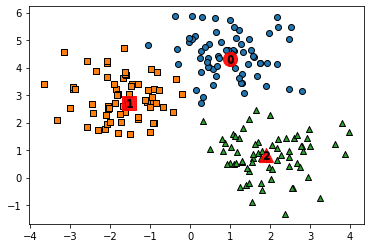

In [68]:
# 마커 중심
marker = ['o','s','^','x','*'] # 넉넉하게 준비
# 군집 갯수를 기반으로 데이터들을 그린다.
# 군집의 중심성에 군집 번호를 그린다.
for label in np.unique(cluster_labels) :
    print(label)
    # 특정 군집 번호에 해당되는 데이터 획득
    tmp = cluster_df[ cluster_df.cluster == label]
    # 데이터 분포
    plt.scatter(x=tmp.c1, y = tmp.c2, edgecolors='k', marker=markers[label])
    # 중심점의 좌표 획득
    cx, cy = meanshift.cluster_centers_[label]
    plt.scatter(x=cx,y=cy, s =200, color='r', alpha=0.9, marker=markers[label])
    plt.scatter(x= cx,y= cy, s=60, color='k', alpha =0.9, marker = f'${label}$')
plt.show()

In [69]:
# 실제 답하고 비교
cluster_df.groupby('target')['cluster'].value_counts()

target  cluster
0       0          67
1       2          67
2       1          65
        2           1
Name: cluster, dtype: int64

- 장점 
    - 유연한 군집화
    - 군집 갯수를 미리 정할 필요가 없다
    - 이상치 데이터가 큰 영향을 미치지 않는다. (밀도 중심이기 때문)
- 단점
    - 시간이 제법 소요된다.
    - 대역폭에 따라 성능이 좌지우지 된다.(베스트대역폭으로 해결이 어느정도 가능)
- 사용
    - 이미지, 영상 쪽에서 움직임 디렉팅에서 많이 사용됨

## GMM

- Gaussian Mixture Model
- **확률 기반 알고리즘**
- 데이터에 여러개의 **가우시안 분포**(정규분포)에 모델을 섞어서, 생성된 모델을 가정하여, 군집화를 수행 -> 가우시안 분포를 섞어서 어떤 밀집된 가우시안 형태가 곧곧에 나타난다.

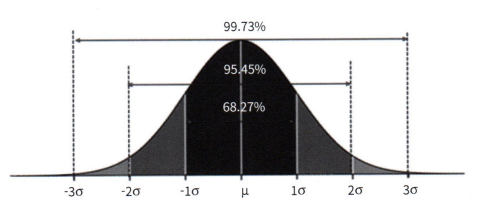

In [71]:
Image('./res/머신러닝_알고리즘_참고쟈료/cluster_gmm_1.png')
# 완벽한 좌우 대칭, 평균 0, 표준편차 1 이런 정규분포를 가진 가우시안 분포를 가지고 진행

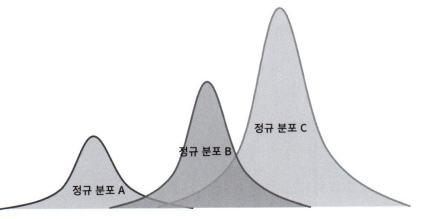

In [72]:
Image('./res/머신러닝_알고리즘_참고쟈료/cluster_gmm_2.png')
# 데이터에 이런 정규 분포가 있을 것이다. 전제
# 삽입

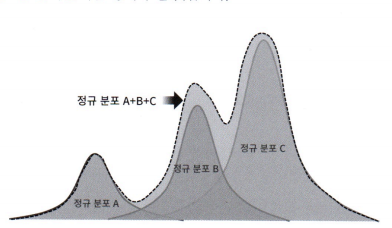

In [73]:
Image('./res/머신러닝_알고리즘_참고쟈료/cluster_gmm_3.png')
# 그렇게 데이터를 살펴보면, 정규 분포가 잘 보이게 강화되었다.
# 이것은 마치 정규분포 3개가 결합된 형태를 취한다. 

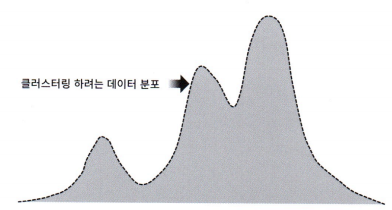

In [74]:
Image('./res/머신러닝_알고리즘_참고쟈료/cluster_gmm_4.png')
# 결론적으로 데이터는 서로 다른 정규분포를 가진 데이터들이 합쳐진 형태다 전제
# 이것을 정규 분포 단위로 군집화하는것 GMM이다. 

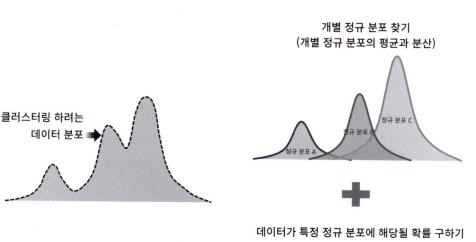

In [76]:
Image('./res/머신러닝_알고리즘_참고쟈료/cluster_gmm_5.png')
# 아래가 최종 결과 형태 -> 3개의 군집이 추출된 것이다. 

- 간단한 정리
    - 2000개의 데이터 세트가 존재한다.
    - 이 데이터에는 여러개의 정규분포 곡선이 존재한다고 추출된다. -> 데이터를 그려보면 알수도 있다. 모른다고 하더라도, 넣어보고 판단 할 수도 있다.
    - 이런 개별 데이터들이 어떤 정규분포상에 포함되는지는 결정, 추출
    - 이런 방식을 일종의 **모수 추정 방식** 이라고 한다.

In [77]:
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

In [78]:
# 데이터 로드, df까지 구성
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [79]:
# GMM 사용
# n_components : 군집의 갯수 => 이 데이터에는 정규분포가 3개가 있을것이다. 전제 
gmm = GaussianMixture(n_components=3, random_state=0)

In [80]:
gmm.fit(iris.data)

GaussianMixture(n_components=3, random_state=0)

In [82]:
gmm_cluster_label = gmm.predict(iris.data)
gmm_cluster_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [83]:
# 실제타겟과 군집으로 분류된 값들 사이에 얼마나 상이한가
iris_df['target'] = iris.target
iris_df['gmm_cluster'] = gmm_cluster_label 
iris_df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,gmm_cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0


In [84]:
# 정답대비 군집 카운트를 계산
iris_df.groupby(['target'])['gmm_cluster'].value_counts()

target  gmm_cluster
0       0              50
1       1              45
        2               5
2       2              50
Name: gmm_cluster, dtype: int64

## DBSCAN

- Density Based Spatial Clustering of Application with Noise
- **밀도 기반 군집화**
- 데이터의 분포가 **기하학적**, 복잡한 데이터 세트인 경우
- 바이오나 영상쪽

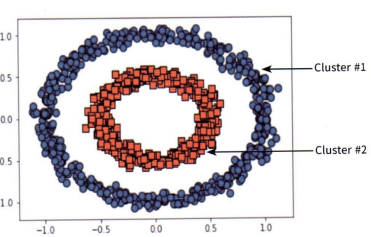

In [87]:
Image('./res/머신러닝_알고리즘_참고쟈료/cluster_dbscan_1.png')

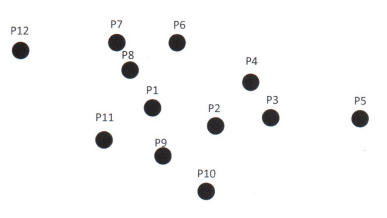

In [88]:
Image('./res/머신러닝_알고리즘_참고쟈료/cluster_gbscan_1.png')
# 데이터의 분포를 보여준다. 

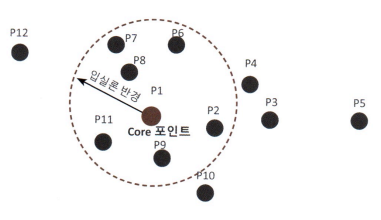

In [89]:
Image('./res/머신러닝_알고리즘_참고쟈료/cluster_gbscan_2.png')
# 입실론값에 의해 반경이 설정(설정값)
# 반경안에 데이터 포인트가 4개 이상이면 군집으로 인정 
# 이런 경우 그 반경안에 중심점을 코어 포인트라고 한다.

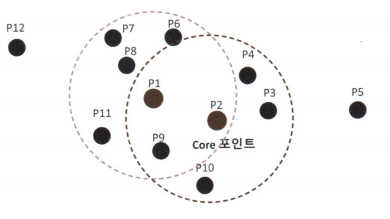

In [90]:
Image('./res/머신러닝_알고리즘_참고쟈료/cluster_gbscan_3.png')
# 첫번째 반경이 조사되고 나서
# 두번째 반경 내에 조사를 했더니, 포인트가 4개가 존재하였다. -> 군집 인정 => 코어포인트 생성(p2)

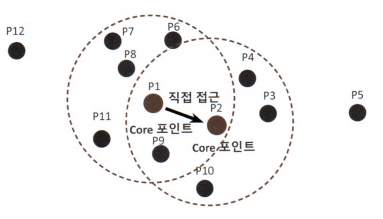

In [91]:
Image('./res/머신러닝_알고리즘_참고쟈료/cluster_gbscan_4.png')
# 2개의 코어 포인트가 각각 입실론 반경 내에 포함되어 있다. 
# 이것은 한개의 군집으로 인정

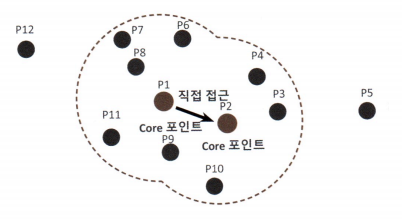

In [92]:
Image('./res/머신러닝_알고리즘_참고쟈료/cluster_gbscan_5.png')
# 한개의 군집으로 합쳐짐 

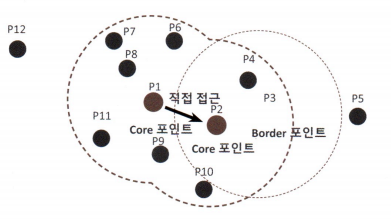

In [93]:
Image('./res/머신러닝_알고리즘_참고쟈료/cluster_gbscan_6.png')
# Border 포인트
# 새로운 지점에서 반경을 잡았는데 데이터 포인트가 1개밖에 없다.
# 반경 내에는 코어포인트가 있다 -> 경계포인트 -> 군집의 경계선을 담당 

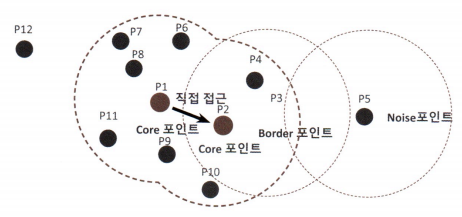

In [94]:
Image('./res/머신러닝_알고리즘_참고쟈료/cluster_gbscan_7.png')
# P5는 데이터인데, 코어랑 겹치지도 않고, 어떤 군집에도 속하지 않는 위치
# 노이즈 포인트

In [95]:
# 더미데이터를 만들어서 비교 확인
from sklearn.datasets import make_circles

In [96]:
# factor는 안쪽원, 바깥쪽 원의 스케일 비율
# 내부원의 *x배 해서 바깥원이 만들어지게 데이터 분포
X,y = make_circles(n_samples=1000, noise=0.05, random_state=0, factor= 0.5)
X.shape

(1000, 2)

In [97]:
X

array([[ 0.51978115, -0.01598068],
       [-0.05771881, -0.42027869],
       [-0.80515504, -0.66222735],
       ...,
       [-0.01203593,  0.39675461],
       [ 0.39812882,  0.31898151],
       [-0.36606628,  0.33958861]])

In [98]:
cluster_df = pd.DataFrame(X, columns=['com_1','com_2'])
cluster_df['target']=y
cluster_df.head(2)

,com_1,com_2,target
0,0.519781,-0.015981,1
1,-0.057719,-0.420279,1


In [99]:
import matplotlib.pyplot as plt

In [100]:
# 군집을 그리거나, 정답을 그리거나
# isCentershow : 군집 중심점을 보이게 할 것인가?
# cluster_model : 군집 처리를 한 알고리즘 객체
def show_cluster_dbscan(df, label_name='target', isCentershow=False, cluster_model=None) :
    # df로부터 정답 추출 -> 라벨
    unique_labels =df[label_name].unique()
    # 군집별 드로잉
    markers = ['o','s','^','x','*','+']
    for label in unique_labels :
        # 데이터 중에서 라벨과 일치한 값들만 모아서
        datas = df[ df[label_name] == label]
        # 산포도를 그린다. -> x축 com_1, y축 com_2
        
        plt.scatter(x = datas['com_1'], y = datas['com_2'], s=70,
                   edgecolors='k', marker=markers[label], label=f'cluster-{ label }')
        
        # 군집 중심점
        if isCentershow :
          # 군집 좌표를 구해서 -> 군집화 처리된 알고리즘 객체가 훈련 후 들어와야 된다. (KMeans, ... )
          # 스캐터를 이용해 배경원을 그리고
          # 그 위에 군집번호를 그린다. 
            pass
        pass 
    
    # 플로팅
    plt.legend()
    plt.show()
    pass 

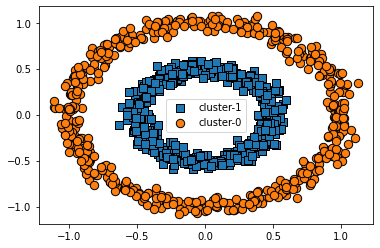

In [101]:
show_cluster_dbscan(cluster_df)

- 해석
  - 위의 그림을 보면 실제 정답은(더미 데이터) 2개의 분류로 잘 구성되었다.
  - 아래에서는 여러 군집 알고리즘으로 군집을 수행하여 2개의 기하학적인 형태로 군집이 잘 되는지 확인 

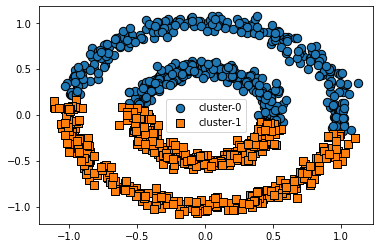

In [103]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
cluster_df['kmeans_cluster'] = kmeans.fit_predict(X)
show_cluster_dbscan(cluster_df, 'kmeans_cluster', False, kmeans)

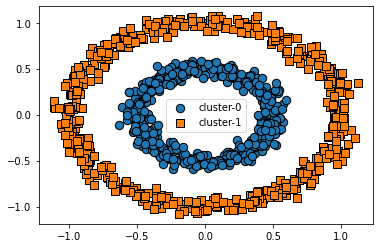

In [104]:
from sklearn.cluster import DBSCAN

# eps : 입실론 반경 값
# min_samples : 반경안에 들어가 있는 데이터 포인트의 최소갯수
# 이 갯수 이상 들어있어야 군집으로 인정하고 코어포인트가 생성
dbscan = DBSCAN(eps=0.2, min_samples = 10)
cluster_df['dbscan_cluster']=dbscan.fit_predict(X)
show_cluster_dbscan(cluster_df, 'dbscan_cluster',False, dbscan)
# 실제 정답과 동일하게 분류(군집이 완성)가 되었다.

- 군집을 진행하고 싶다면 -> 산포도를 그려서 데이터의 분포를 확인하고, 
- 가장 적절한 군집 알고리즘을 적용하여 군집 처리를 수행하면 된다.
- 단, 데이터 분포에 대한 통찰이 잘 안잡히면, 여러군집 알고리즘을 적용하여 가장 나은 구조를 사용하면 된다.
- 더불어, 독립변수가 2개(선형(단일)회귀) 인가? 
- 그 이상인가(다중회귀 -> 변수를 (상관성분석 후) 줄일것인가?, 차원축소를 할 것인가?),
- 데이터가 수치가 아니라도 (수치화 할것인가? -> 원-핫 인코딩을 이용하여 수치처리 할 수 있음) -> 진행